<a href="https://colab.research.google.com/github/Guilherme-Vicente/Conversao-de-Velocidade/blob/master/Quarentena_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 01


In [1]:
print('Guilherme Vicente')

Guilherme Vicente


In [0]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

In [4]:
filmes.columns = ['filmeId', ' titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacao = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")

In [6]:
avaliacao.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
avaliacao.shape

(100836, 4)

In [8]:
len(avaliacao)

100836

In [0]:
avaliacao.columns = ['usuarioId', 'filmeId', 'Nota', 'Momento']

In [10]:
avaliacao.head()

,usuarioId,filmeId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
avaliacao.describe()

,usuarioId,filmeId,Nota,Momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
avaliacao_filme_1 = avaliacao.query("filmeId==1")

In [0]:
Notas_medias_porfilmes = avaliacao.groupby("filmeId")['Nota'].mean()

In [14]:
Notas_medias_porfilmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

##Desafio 2 
# Mudar o nome da coluna nota para media


In [15]:
filmes_com_media = filmes.join(Notas_medias_porfilmes, on="filmeId")
filmes_com_media = filmes_com_media.rename(columns={'Nota': 'Media'})
filmes_com_media.head()

,filmeId,titulo,genero,Media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [16]:
filmes_com_media.sort_values("Media", ascending=False)

,filmeId,titulo,genero,Media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


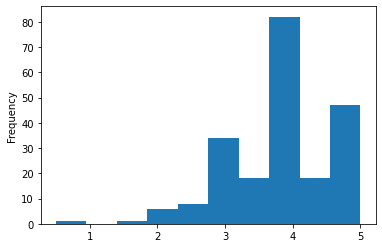

In [17]:
avaliacao_filme_1 = avaliacao.query("filmeId==1")['Nota'].plot(kind='hist')

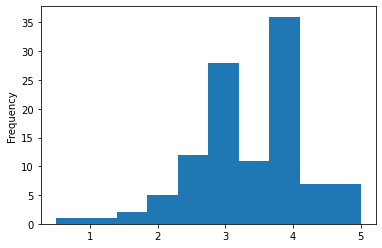

In [18]:
avaliacao_filme_2 = avaliacao.query("filmeId==2")['Nota'].plot(kind='hist')


# Desafio 1 
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?
Determine quantos filmes não tem avaliações e quais são esses filmes.



```
# This is formatted as code
```



In [36]:
filmes_com_media['Media'].isnull().sum()

18

In [34]:
select = filmes_com_media['Media'].isnull()
filmes_com_media[select]

,filmeId,titulo,genero,Media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


#Desafio 2 do Guilherme Silveira
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [37]:
ilmes_com_media = filmes.join(Notas_medias_porfilmes, on="filmeId")
filmes_com_media = filmes_com_media.rename(columns={'Media': 'Nota_Media'})
filmes_com_media.head()

,filmeId,titulo,genero,Nota_Media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#Desafio 3 do Guilherme Silveira
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [40]:
total_votos_por_filme = avaliacao.groupby('filmeId')['Nota'].count()
total_votos_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: Nota, dtype: int64

In [41]:
filmes_com_media_e_votos = filmes_com_media.join(total_votos_por_filme, on='filmeId')
filmes_com_media_e_votos = filmes_com_media_e_votos.rename(columns={'Nota': 'total_votos'})
filmes_com_media_e_votos.head()

,filmeId,titulo,genero,Nota_Media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


#Desafio 4 do Thiago Gonçalves
Arredondar as médias (coluna de nota média) para duas casas decimais

In [42]:
filmes_com_media_e_votos['Nota_Media'] = filmes_com_media_e_votos['Nota_Media'].round(2)
filmes_com_media_e_votos 

,filmeId,titulo,genero,Nota_Media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


#Desafio 5 do Allan Spadini
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [44]:
generos_df = filmes_com_media_e_votos.genero.str.get_dummies('|')
generos = generos_df.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

#Desafio 6 da Thais André
Contar o número de aparições de cada genero.

In [46]:
total_filmes_por_genero = filmes_com_media_e_votos.genero.str.get_dummies().sum().sort_values(ascending=False)
total_filmes_por_genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

#Desafio 7 do Guilherme Silveira
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

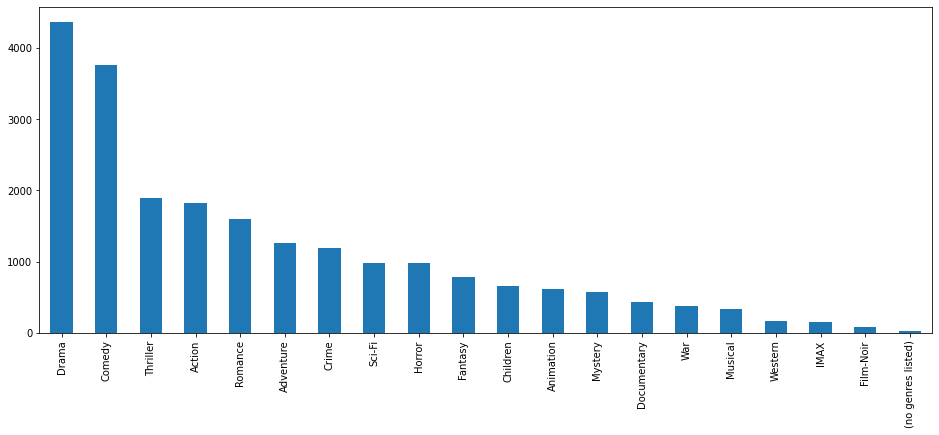

In [47]:
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6))

## Aula 02


In [20]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).head()

Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
dtype: int64

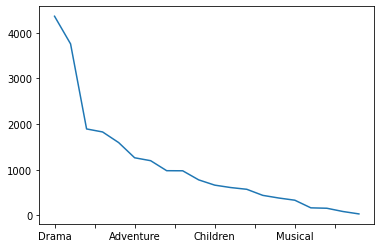

In [21]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot()

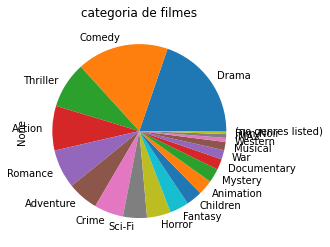

In [22]:
# Nao recomendado
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='pie', title='categoria de filmes')

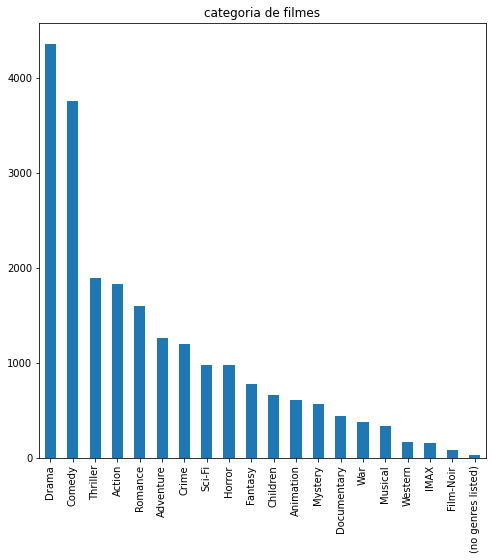

In [23]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='bar', title='categoria de filmes', figsize=(8, 8))

In [24]:
filmes['genero'].str.get_dummies('|').sum().sort_index(ascending=True)

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [0]:
import seaborn as sns

In [26]:
filmes_com_media.sort_values('Media', ascending=False)[2450:2500]

,filmeId,titulo,genero,Media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [0]:
def plot_filme(n):
    nota_filme = avaliacao.query(f"filmeId=={n}")['Nota']
    nota_filme.plot(kind='hist')
    plt.show()
    nota_filme.plot.box()
    plt.show()
    return nota_filme.describe()



AttributeError: ignored

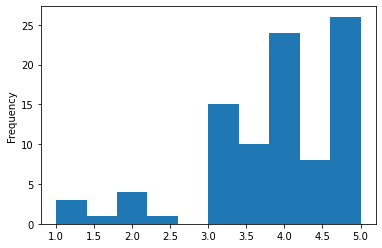

In [28]:
plot_filme(919)

AttributeError: ignored

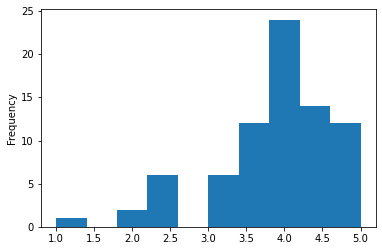

In [29]:
plot_filme(46578)

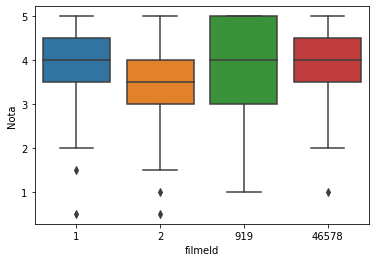

In [30]:
sns.boxplot(data = avaliacao.query("filmeId in [1, 2, 919, 46578]"), x='filmeId', y='Nota')

#
Desafio 1 do Guilherme Silveira

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

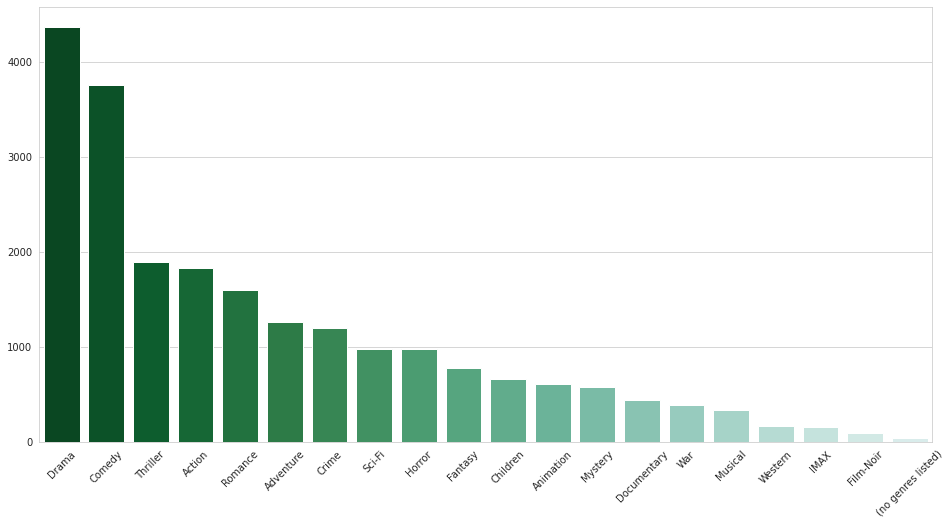

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize = (16,8))
ax = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))

plt.xticks(rotation=45)
plt.show()

#Desafio 2 do Paulo Silveira

Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

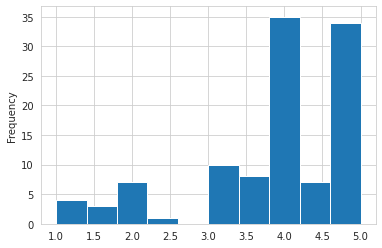

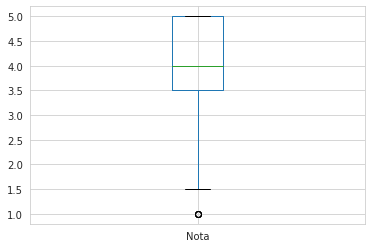

count    109.000000
mean       3.894495
std        1.103600
min        1.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: Nota, dtype: float64

In [63]:
plot_filme(924) # 2001: A Space Odyssey (1968)

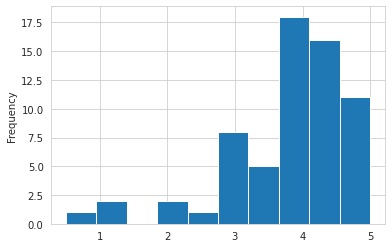

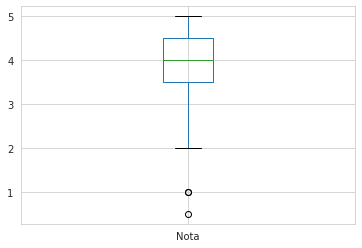

count    64.000000
mean      3.898438
std       1.008612
min       0.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: Nota, dtype: float64

In [64]:
plot_filme(55820) # No Country for Old Men (2007)

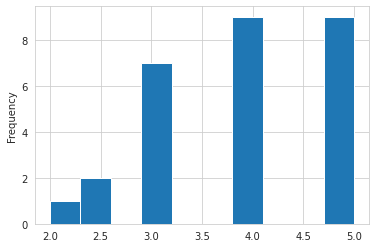

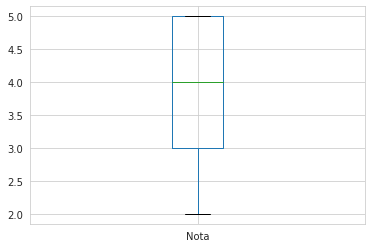

count    28.000000
mean      3.892857
std       0.946310
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Nota, dtype: float64

In [65]:
plot_filme(2150) # Gods Must Be Crazy, The (1980)

#Desafio 3 do Paulo Silveira

Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

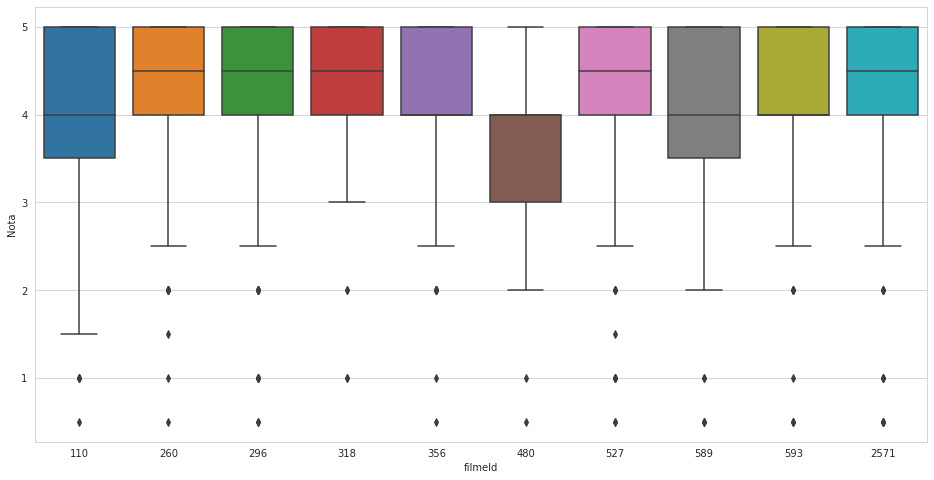

In [71]:
contagem_filmes = avaliacao.groupby("filmeId").count().sort_values("Nota", ascending=False)["Nota"]
top10 = contagem_filmes.head(10).index

plt.figure(figsize=(16, 8))
sns.boxplot(data = avaliacao.query("filmeId in @top10"), x ="filmeId", y="Nota")


#Desafio 4 do Guilherme Silveira

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [76]:
avaliacoes_nomes = avaliacao.join(filmes[["titulo","filmeId"]].set_index('filmeId')["titulo"],on="filmeId")
avaliacoes_nomes.head()
sns.boxplot(data = avaliacao_nomes.query("filmeId in [1,2,919,46578]"), x ="titulo", y="nota")
plt.xticks(rotation=70)
plt.show()

KeyError: ignored

#Desafio 5 do Allan Spadini

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    notas = avaliacao.query(f'filmeId == {filme_id}')['Nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print('------------')

In [82]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
------------
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
------------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
------------


In [83]:
explora_filme(2041)
explora_filme(7541)
explora_filme(160080)

Filme: Condorman (1981)

Moda: [4.]
Média: 3.3333333333333335
Mediana: 4.0
------------
Filme: 100 Girls (2000)

Moda: [3.5]
Média: 3.25
Mediana: 3.5
------------
Filme: Ghostbusters (2016)

Moda: [3.  3.5]
Média: 3.125
Mediana: 3.25
------------


In [84]:
explora_filme(177593)
explora_filme(1178)
explora_filme(4334)

Filme: Three Billboards Outside Ebbing, Missouri (2017)

Moda: [4.5 5. ]
Média: 4.75
Mediana: 4.75
------------
Filme: Paths of Glory (1957)

Moda: [5.]
Média: 4.541666666666667
Mediana: 4.75
------------
Filme: Yi Yi (2000)

Moda: [5.]
Média: 4.6
Mediana: 5.0
------------


#Desafio 6 da Thais André

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

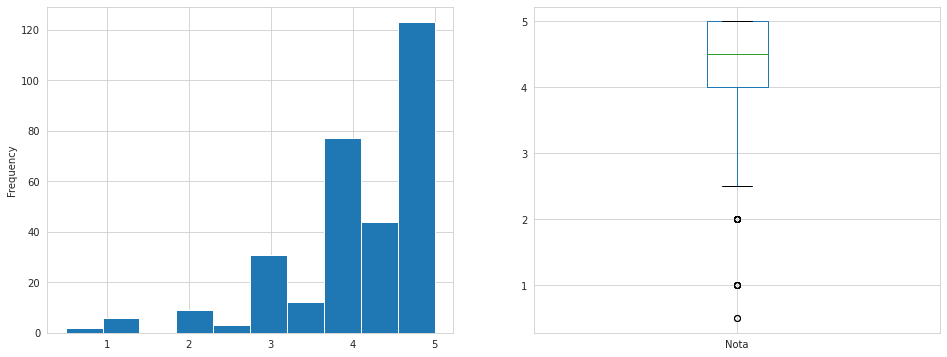

In [85]:
pulp_fiction = avaliacao.query('filmeId == 296')['Nota']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

pulp_fiction.plot(kind='hist', ax=axes[0])
pulp_fiction.plot(kind='box', ax=axes[1])

plt.show()

#Desafio 7 do Thiago Gonçalves

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [89]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media["titulo"].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

KeyError: ignored

#Aula 03

In [91]:
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [92]:
#P/ saber as cores unicas q tem na tabela
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [94]:
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [95]:
len(imdb['color'])

5043

In [0]:
imdb['num_critic_for_reviews'].describe()

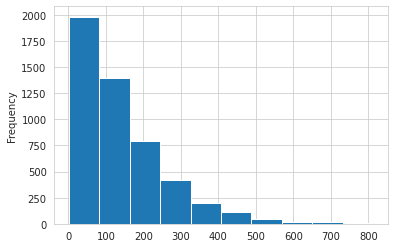

In [96]:
imdb['num_critic_for_reviews'].plot(kind='hist')

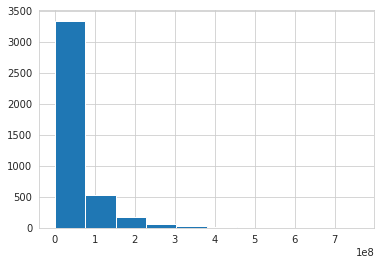

In [97]:
imdb['gross'].hist()

In [0]:
import seaborn as sns

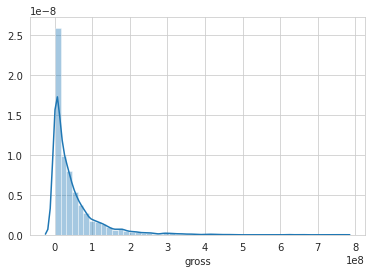

In [99]:
sns.distplot(imdb['gross'])

In [100]:
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [101]:
color_or_bw = imdb.query('color in ["Color", " Black and White"]')
len(color_or_bw)

5024

In [102]:
color_or_bw['color_or_0_1'] = (color_or_bw['color']=='Color') * 1
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_or_0_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [103]:
color_or_bw['color_or_0_1'].value_counts()

1    4815
0     209
Name: color_or_0_1, dtype: int64

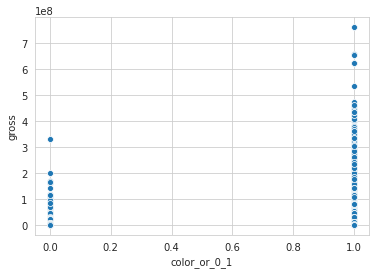

In [104]:
sns.scatterplot(data=color_or_bw, x='color_or_0_1', y='gross')

In [105]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [106]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [107]:
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

In [0]:
budget_gross = imdb[['budget', 'gross']].dropna().query("budget >0 | gross > 0")

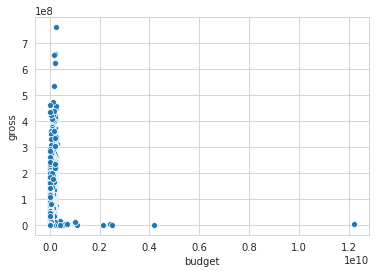

In [109]:
sns.scatterplot(x='budget', y='gross', data = budget_gross)

In [110]:
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [0]:
imdb['country'].unique()

In [0]:
imdb = imdb.drop_duplicates()

In [0]:
imdb_usa = imdb.query("country == 'USA'")

In [113]:
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


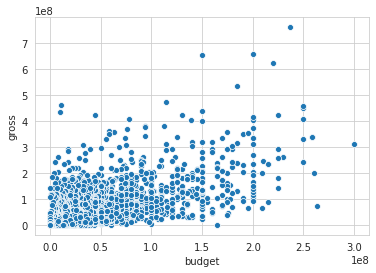

In [114]:
budget_gross = imdb_usa[['budget', 'gross']].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x='budget', y='gross', data = budget_gross)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


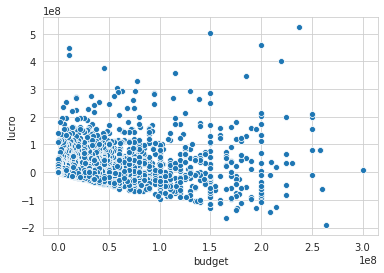

In [115]:
imdb_usa['lucro'] = imdb_usa["gross"] - imdb_usa["budget"]

budget_gross = imdb_usa.query("budget >0 |  gross > 0")[['budget', 'lucro']].dropna()

sns.scatterplot(x='budget', y='lucro', data = budget_gross)


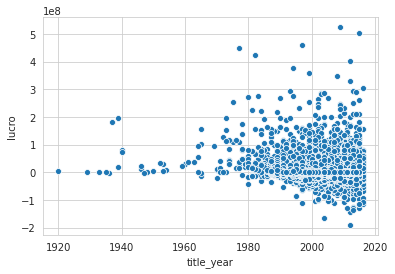

In [116]:
budget_gross = imdb_usa.query("budget >0 |  gross > 0")[['title_year', 'lucro']].dropna()

sns.scatterplot(x='title_year', y='lucro', data = budget_gross)

In [117]:
filmes_por_diretor = imdb_usa['director_name'].value_counts()
filmes_por_diretor.head()

Steven Spielberg    24
Martin Scorsese     20
Clint Eastwood      20
Woody Allen         18
Spike Lee           16
Name: director_name, dtype: int64

In [118]:
gross_director = imdb_usa[['director_name', 'gross']].set_index("director_name").join(filmes_por_diretor, on='director_name')
gross_director.columns = ['dindin', 'filmes_irmaos']
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


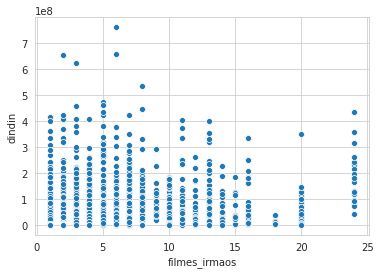

In [119]:
sns.scatterplot(x='filmes_irmaos', y='dindin', data = gross_director)

In [120]:
imdb_usa[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


#Desafio 1
Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

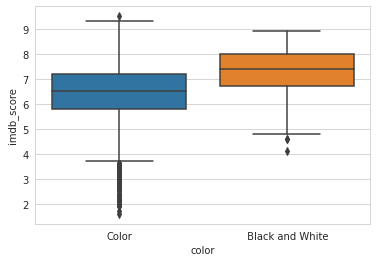

In [121]:
sns.boxplot(x='color', y='imdb_score', data=color_or_bw)

In [122]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_or_0_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


#Desafio 2
No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).


In [124]:
imdb_usa.sort_values('lucro').head(1)['movie_title']

5    John Carter 
Name: movie_title, dtype: object

#Desafio 3
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.
Novamente aqui vamos trabalhar apenas com filmes com lucros negativos (prejuízos), só que desta vez não nos interessa o orçamento e sim o ano de publicação, então vamos filtra-los:

In [125]:
imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending=False).head(20)[['movie_title', 'lucro', 'title_year']]

,movie_title,lucro,title_year
163,Gods of Egypt,-108858926.0,2016.0
2549,The Young Messiah,-12037424.0,2016.0
2404,My Big Fat Greek Wedding 2,41573085.0,2016.0
244,The Huntsman: Winter's War,-67047980.0,2016.0
1742,The Boss,34034755.0,2016.0
73,Suicide Squad,-13912817.0,2016.0
150,Ghostbusters,-25900341.0,2016.0
154,Kung Fu Panda 3,-1476537.0,2016.0
65,X-Men: Apocalypse,-23014913.0,2016.0
567,The Angry Birds Movie,34225164.0,2016.0


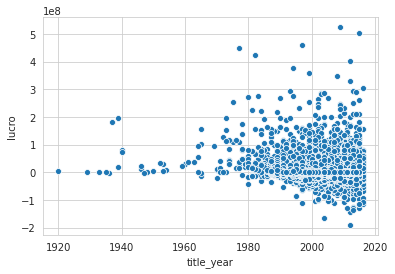

In [126]:
lucro_year = imdb_usa[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data=lucro_year)

#Desafio 4
Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [128]:
pre_war = imdb_usa.query('title_year < 1940').sort_values('lucro', ascending=False).dropna()
pre_war[['movie_title', 'lucro']].head()

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0
4157,The Wizard of Oz,19402612.0
4812,The Broadway Melody,2429000.0
4706,Top Hat,2391000.0


#Desafio 5
No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen.

In [129]:
gross_director.drop_duplicates('director_name').query('filmes_irmaos == 18')

,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0


In [131]:
gross_director[(gross_director['filmes_irmaos'] > 16) & (gross_director['filmes_irmaos'] < 20)]

,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0
1737,Woody Allen,16684352.0,18.0
1861,Woody Allen,13383737.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1993,Woody Allen,3203044.0,18.0
2070,Woody Allen,14792779.0,18.0
2078,Woody Allen,4839383.0,18.0


#Desafio 6
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

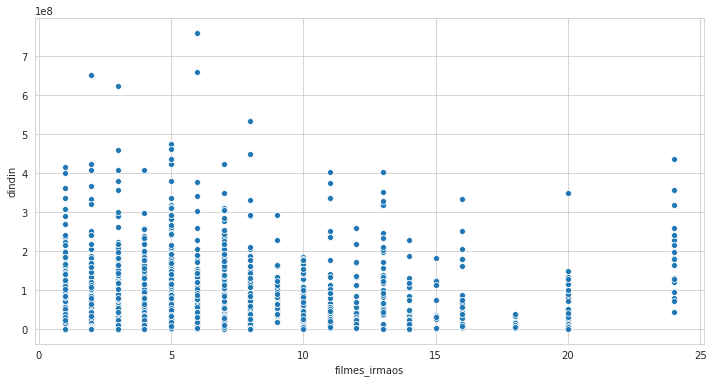

In [135]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="filmes_irmaos", y="dindin", data=gross_director)

#Desafio 7
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [134]:
filmes_depois_de_2000 = imdb_usa.query('title_year >= 2000')
filmes_depois_de_2000[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


#Desafio 8
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)
Acho que ele quer um regressão linear...

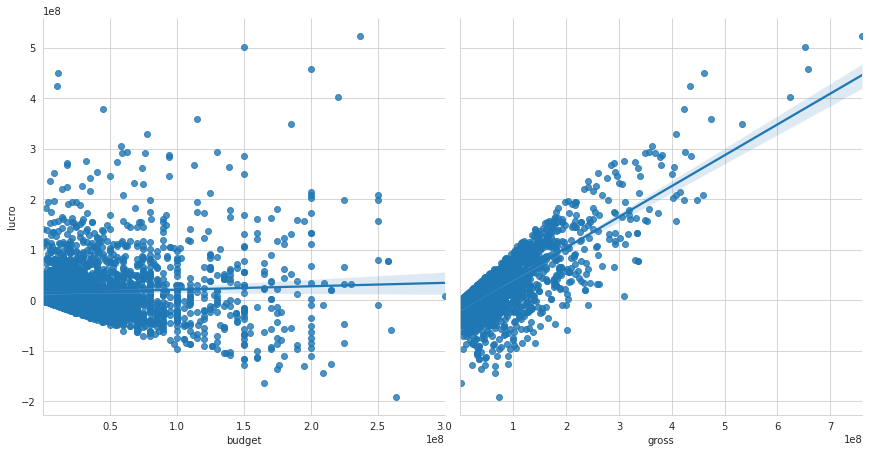

In [133]:
sns.pairplot(imdb_usa, y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')

#Desafio 9
Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

In [136]:
imdb_usa[["gross", "budget", "imdb_score"]].corr()

,gross,budget,imdb_score
gross,1.000000,0.645673,0.258948
budget,0.645673,1.000000,0.078936
imdb_score,0.258948,0.078936,1.000000


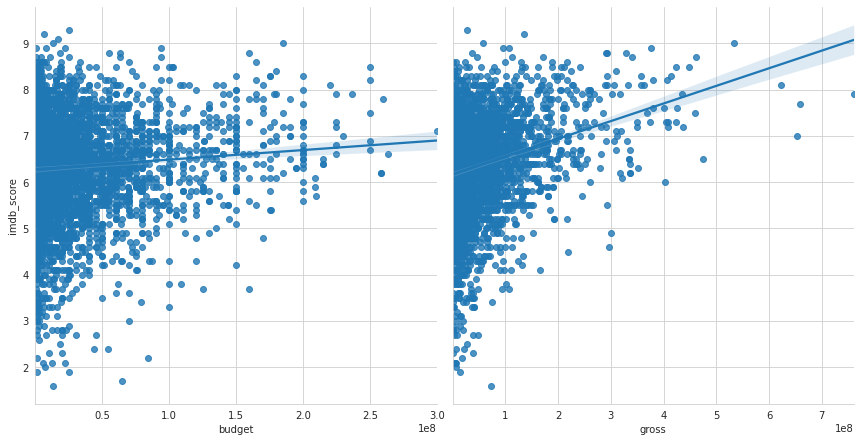

In [137]:
sns.pairplot(imdb_usa, y_vars='imdb_score', x_vars=['budget', 'gross'], height=6, kind='reg')

In [138]:
votos_por_ano = imdb_usa.groupby('title_year')['num_voted_users'].mean()
imdb_usa_votos_por_ano = imdb_usa.join(votos_por_ano, on='title_year', rsuffix='rs')
imdb_usa_votos_por_ano.rename(columns={'num_voted_usersrs': 'votos_por_ano'}, inplace=True)
imdb_usa_votos_por_ano.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro,votos_por_ano
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,90459.213115
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,105898.240000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,116836.911765
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,116836.911765
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0,105898.240000


In [139]:
imdb_usa_votos_por_ano[['title_year', 'votos_por_ano']].corr()

,title_year,votos_por_ano
title_year,1.000000,0.142897
votos_por_ano,0.142897,1.000000


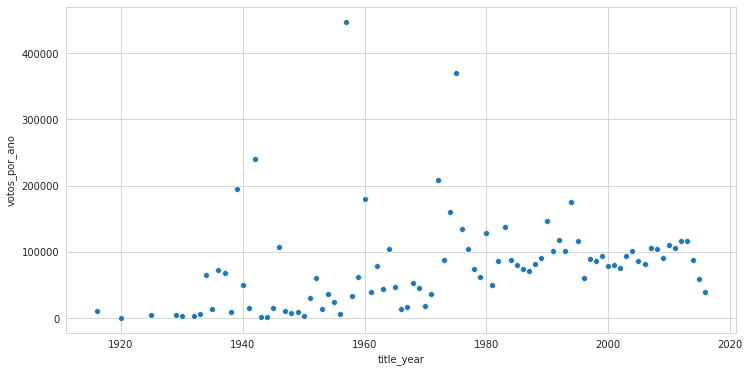

In [140]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title_year', y='votos_por_ano', data=imdb_usa_votos_por_ano)